In [4]:
import numpy as np
from qiskit import QuantumCircuit
import pennylane as qml
import cancel_cnots

num_qubits = 4

dev = qml.device("default.qubit", wires=num_qubits)

state = np.random.rand(2**num_qubits) + 1j * np.random.rand(2**num_qubits)
state = state / np.linalg.norm(state)

depth: 50


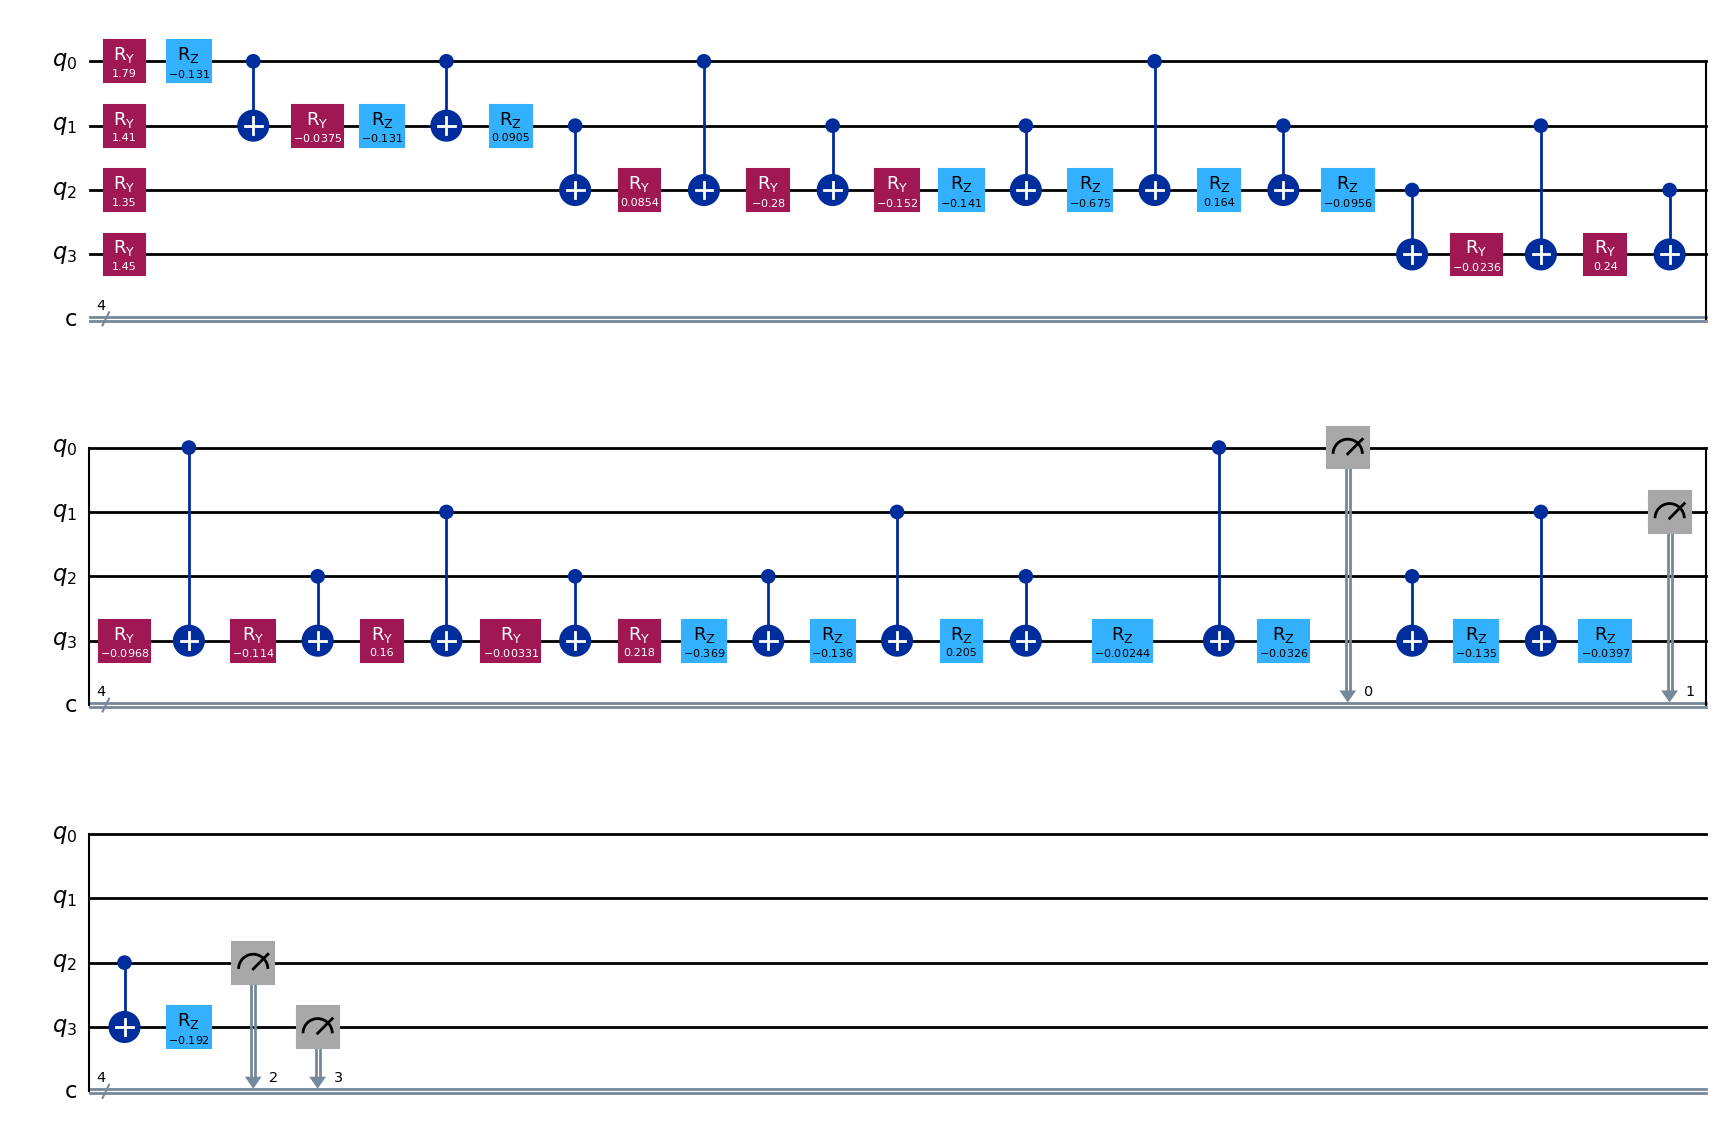

In [5]:
@qml.qnode(dev)
def circuit(state):
    cancel_cnots.amplitude_embedding(state_vector=state, wires=range(num_qubits))
    return qml.state()


np.testing.assert_approx_equal(
    np.abs(np.vdot(state, circuit(state))), 1.0
)  # If this fails, the state is not equal up to a global phase
qasm_circuit = circuit.qtape.to_openqasm()
qiskit_circuit = QuantumCircuit.from_qasm_str(qasm_circuit)

print("depth:", qiskit_circuit.depth())
qiskit_circuit.draw("mpl", style="iqp")